In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Nearest Neighbors

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

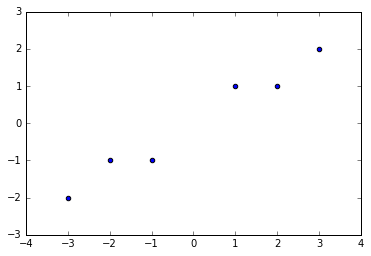

In [11]:
plt.scatter(X[:,0],X[:,1])

In [12]:
#nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
#nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X)
nbrs = NearestNeighbors(n_neighbors=2).fit(X)

distances, indices = nbrs.kneighbors(X)

print distances
print indices

print nbrs.kneighbors_graph(X).toarray()

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]
[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1.]]


In [13]:
import sys
import urllib
import urlparse
import re
from hmmlearn import hmm
import numpy as np
from sklearn.externals import joblib
import HTMLParser
import nltk
import csv
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn import metrics

In [14]:
N=100

def load_user_cmd(filename):
    cmd_list=[]
    dist_max=[]
    dist_min=[]
    dist=[]
    with open(filename) as f:
        i=0
        x=[]
        for line in f:
            line=line.strip('\n')
            x.append(line)
            dist.append(line)
            i+=1
            if i == 100:
                cmd_list.append(x)
                x=[]
                i=0

    fdist = FreqDist(dist).keys()
    dist_max=set(fdist[0:50])
    dist_min = set(fdist[-50:])
    return cmd_list,dist_max,dist_min

def get_user_cmd_feature(user_cmd_list,dist_max,dist_min):
    user_cmd_feature=[]
    for cmd_block in user_cmd_list:
        f1=len(set(cmd_block))
        fdist = FreqDist(cmd_block).keys()
        f2=fdist[0:10]
        f3=fdist[-10:]
        f2 = len(set(f2) & set(dist_max))
        f3=len(set(f3)&set(dist_min))
        x=[f1,f2,f3]
        user_cmd_feature.append(x)
    return user_cmd_feature

def get_label(filename,index=0):
    x=[]
    with open(filename) as f:
        for line in f:
            line=line.strip('\n')
            x.append( int(line.split()[index]))
    return x

In [22]:
if __name__ == '__main__':
    user_cmd_list,user_cmd_dist_max,user_cmd_dist_min=load_user_cmd("data/MasqueradeDat/User11")
    user_cmd_feature=get_user_cmd_feature(user_cmd_list,user_cmd_dist_max,user_cmd_dist_min)
    labels=get_label("data/MasqueradeDat/label.txt",2)
    y=[0]*50+labels

    x_train=user_cmd_feature[0:N]
    y_train=y[0:N]

    x_test=user_cmd_feature[N:150]
    y_test=y[N:150]

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_train, y_train)
    y_predict=neigh.predict(x_test)

    score=np.mean(y_test==y_predict)*100

    print y
    print y_train
    print y_test
    print y_predict
    print score

    print classification_report(y_test, y_predict)

    print metrics.confusion_matrix(y_test, y_predict)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0